In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


**Data** **Exploration**

The problem is supervised text classification problem, and our goal is to investigate which supervised machine learning methods are best suited to solve it.
Given a new variety comes in, we want to assign it to one of 28 categories. The classifier makes the assumption that each new variety is assigned to one and only one category. This is multi-class text classification problem. Lets Start!

Importing Necessary Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading both train and test files

In [0]:
train=pd.read_csv('/gdrive/My Drive/Knight ML Assignment/Data/train.csv')

In [0]:
test=pd.read_csv('/gdrive/My Drive/Knight ML Assignment/Data/test.csv')

In [5]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [6]:
train.info

<bound method DataFrame.info of            user_name  ...                     variety
0                NaN  ...                  Chardonnay
1      @wawinereport  ...                   Red Blend
2                NaN  ...                    Nebbiolo
3         @vossroger  ...  Bordeaux-style White Blend
4         @vossroger  ...                      Malbec
...              ...  ...                         ...
82652    @wineschach  ...                 Tempranillo
82653            NaN  ...          Cabernet Sauvignon
82654     @vossroger  ...                       Gamay
82655     @vossroger  ...    Bordeaux-style Red Blend
82656            NaN  ...          Cabernet Sauvignon

[82657 rows x 12 columns]>

**Exploratory Data** **Analysis**

At first i should check where values are missing.

In [7]:
train.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

Luckily there isn't any data missing in the description and variety columns, which are the main columns I need for this analysis. 

Lets now remove any duplicate fields and check the shape before and after removing duplicates

In [8]:
#Before removing duplicates
train.shape

(82657, 12)

In [9]:
#shape after removing duplicates
train.drop_duplicates(inplace=True)
train.shape

(77641, 12)

If we list unique varieties in this dataset, we find that there are a lot of them here.

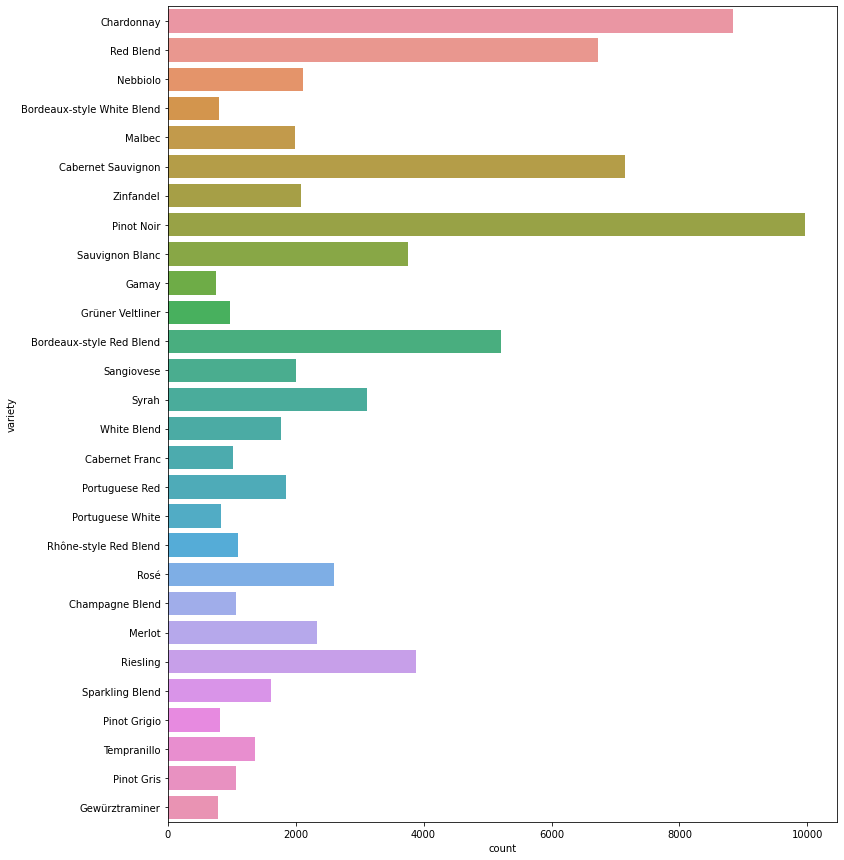

In [10]:
plt.figure(figsize=(12,15)) 
sns.countplot(data=train, y = "variety") 


We see that the number of varieties are imbalanced. When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. 
However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

Lets know the number of unique varieties

In [11]:
train['variety'].nunique()

28

so we need a multi classification technique to classify these 28 labels lets now look at which countries are the major producers of the wine?

In [12]:
countries = train['country'].value_counts(ascending=False)
print("total number of countries: ", len(countries))
countries

total number of countries:  38


US                36269
France            14968
Italy              8544
Portugal           2998
Chile              2740
Spain              2583
Argentina          2433
Austria            1770
Germany            1466
New Zealand        1033
Australia           976
South Africa        678
Israel              303
Canada              153
Greece              135
Bulgaria             91
Romania              69
England              55
Mexico               38
Slovenia             38
Moldova              34
Hungary              32
Turkey               32
Uruguay              29
Brazil               28
Lebanon              27
Morocco              19
Croatia              12
Georgia              11
Ukraine              11
Peru                  8
Cyprus                6
Macedonia             4
Switzerland           4
Luxembourg            4
Czech Republic        3
Serbia                3
India                 1
Name: country, dtype: int64

We will create barplot of major wine producers that produce more than 1000 different wines

Major wine producers: Index(['US', 'France', 'Italy', 'Portugal', 'Chile', 'Spain', 'Argentina',
       'Austria', 'Germany', 'New Zealand', 'Australia', 'South Africa'],
      dtype='object')


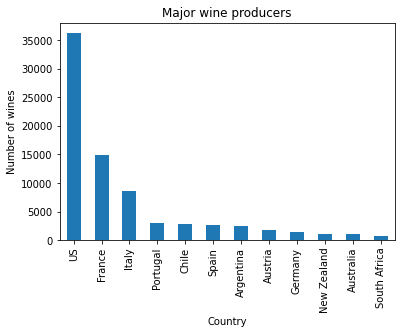

In [13]:
countries[:12].plot(kind='bar')
plt.title("Major wine producers")
plt.ylabel("Number of wines")
plt.xlabel("Country")
major= countries[:12].index
print("Major wine producers:", major)


Let's see which Province had the most reviews in the dataset.

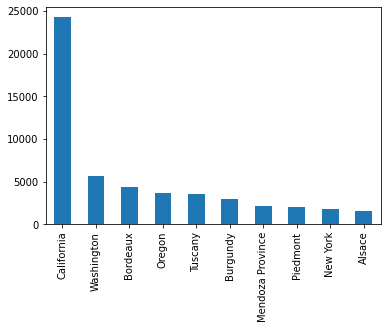

In [14]:
train['province'].value_counts().head(10).plot.bar()

we plot a distribution of the points plotted by the review counts.

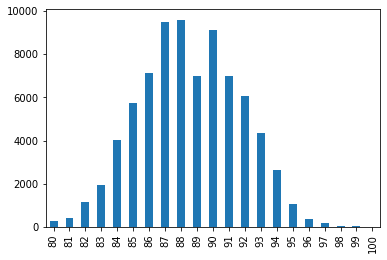

In [15]:
# Bar plot - points/reviews
train['points'].value_counts().sort_index().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


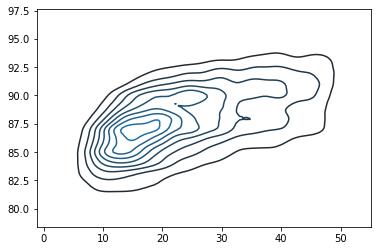

In [16]:
sns.kdeplot(train[train['price'] < 50].loc[:, ['price', 'points']].dropna().sample(5000))

A Hex grid allows us to visualize the data from the KDE and jointplots.

Here we can clearly see the density of point and pricing and how they interact.

It appears that the wines in the 10.00 - 20.00 range have the highest concentration of consistent points.

This means that overall, wines in the 10.00 - 20.00 range have frequently better ratings when compared to more expensive wines.

This could be due to the price point of these wines, or the fact that most consumers drink expensive wines less frequently for special occasions.

It makes sense for the wine producers to focus on the market demand for their products and target their resources towards the taste of the public.

Lets do one hot encoding on the variety coloumn

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['variety'])
train['labels']=le.transform(train['variety']) 


In [0]:
train['labels'].value_counts()
y=train['labels']

**Natural Language Processing**

Importing Necessary libraries

In [0]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Data cleaning like removing spaces,numbers and special characters and also converting the text into lower case.

In [0]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    # split text
    text = text.split()
    
    return text

Mapping cleaning function on review description 

In [0]:
train['clean_desc'] = train['review_description'].apply(lambda x: clean_text(x))

Now the text is cleaned lets have a look

In [22]:
train['clean_desc'][0]

['classic',
 'chardonnay',
 'aromas',
 'of',
 'apple',
 'pear',
 'and',
 'hay',
 'lead',
 'into',
 'a',
 'palate',
 'marked',
 'by',
 'decent',
 'intensity',
 'but',
 'also',
 'a',
 'bit',
 'of',
 'sweetness',
 'orange',
 'and',
 'candy',
 'notes',
 'run',
 'through',
 'the',
 'rather',
 'short',
 'finish']

In [23]:
train['review_description'][0]

'Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.'

Importing Stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


Importing stemmer to convert words into their stem form

In [0]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

Creating a function to remove stopwords and doing stemming

In [0]:
def remove_stopwords(text):
    no_stopword_text = [stemmer.stem(word) for word in text if not word in set(stopwords.words('english'))]
    return ' '.join(no_stopword_text)


Mapping the function on cleaned Text

In [0]:
train['clean_desc'] = train['clean_desc'].apply(lambda x: remove_stopwords(x))

Let's have a look Everything seems to be working fine

In [29]:
train['clean_desc'][4:20]

4     ripe sweet wine rich full dri fresh fruit flav...
5     strident aroma licoric herb berri mint make in...
6     half syrah half cabernet sauvignon new french ...
7     high tone red fruit star wine nice show sought...
8     display typic mcminnvil ava subtleti frame tig...
9     blend sangioves merlot open aroma forest floor...
10    allur bouquet fresh cut jasmin citru light vib...
11    start bit funki struck match aroma partial obs...
12    produc henri fessi cru vineyard wine fruiti ac...
13    creami round note hit nose first follow aroma ...
14    outstand alway right first take elev sens nose...
15    solid tannin mark wine need age structur domin...
16    ripe dark fruit leather chocol aroma lead nose...
17    leesi aroma tropic fruit banana can peach swee...
18    aroma suggest underbrush aromat herb violet ne...
19    aroma stew prune fig follow evolv palat along ...
Name: clean_desc, dtype: object

Now lets import Tfidf vectorizer 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['clean_desc'])

print(X)

  (0, 5876)	0.10946061998598532
  (0, 14313)	0.27918547771267516
  (0, 12839)	0.24912717010376745
  (0, 13593)	0.2887712907007304
  (0, 10848)	0.13737580044573572
  (0, 2438)	0.22951303963689193
  (0, 11114)	0.20372055104633177
  (0, 15608)	0.157207040805165
  (0, 1551)	0.20196091665768928
  (0, 410)	0.19960613544841962
  (0, 7942)	0.19766424420215775
  (0, 4300)	0.3143136029248507
  (0, 9554)	0.25082133701762044
  (0, 11398)	0.11384040164835926
  (0, 8795)	0.1993410026313348
  (0, 7317)	0.33649649639248747
  (0, 11611)	0.1891612062448608
  (0, 663)	0.163658310290327
  (0, 773)	0.11245833628028028
  (0, 2897)	0.20229663697665495
  (0, 3229)	0.25176703442691456
  (1, 13111)	0.35876109129791
  (1, 7263)	0.21926881055684738
  (1, 4369)	0.18091315656259477
  (1, 14128)	0.2340261767198523
  :	:
  (77640, 9153)	0.22033902065991479
  (77640, 7742)	0.1828155870721297
  (77640, 10693)	0.1602274402407175
  (77640, 5435)	0.15942336801272441
  (77640, 8109)	0.1606482695049816
  (77640, 9825)	0.186

**Model** **Selction**

After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

Lets Start with Logistic Regression


In [36]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

68.63931998196921


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


It sure gives a decent score now lets try LinearSVC

In [41]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

68.6135617232275


Score is almost similar to that of logistic regression lets generate a classification Report

In [45]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1009
           1       0.58      0.44      0.50       159
           2       0.60      0.31      0.41       221
           3       0.61      0.71      0.65      1415
           4       0.76      0.61      0.68       229
           5       0.74      0.87      0.80      1743
           6       0.67      0.59      0.63       163
           7       0.78      0.65      0.71       170
           8       0.78      0.73      0.75       191
           9       0.53      0.45      0.49       377
          10       0.59      0.39      0.47       479
          11       0.77      0.82      0.79       428
          12       0.71      0.57      0.64       187
          13       0.67      0.44      0.53       239
          14       0.73      0.82      0.77      1994
          15       0.65      0.65      0.65       368
          16       0.64      0.41      0.50       169
          17       0.70    

Our both models have done a very good job a little hyperparameter tuning and Further NLP processing would improve the accuracy even more so lets try our final model MultinomialNB.

In [54]:
from sklearn.naive_bayes import MultinomialNB
cf = MultinomialNB().fit(X_train, y_train)
y_pred = cf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

45.41181016163308


**Model** **Evaluation**

It surely fails as compared to previous models. so we can freely declare Logistic Regression as our required model with maximum accuracy.
Lets put it on a test for first 10 reviews of our test dataset and see if its working fine.

In [70]:

for i in range (0,10):
  rew=logisticRegr.predict(vectorizer.transform([test['review_description'][i]]))
  print(rew)

[5]
[9]
[5]
[9]
[17]
[5]
[14]
[3]
[17]
[14]
